### Score: 28

Q1.[9]

Q2.[10+9]

        mag  latitude  longitude
37371   8.2  -19.6097   -70.7691
50562   7.9   51.8486   178.7352
36918   7.7  -20.5709   -70.4931
33808   7.6  -11.2701   162.1481
31496   7.5   -6.7547   155.0241
33537   7.4  -11.4633   162.0511
95913   7.3   12.5262   -88.1225
31850   7.2   17.3970  -100.9723
34318   7.1   -6.5858   155.0485
111052  7.1  -19.6903  -177.7587
106285  7.1    1.8929   126.5217
97602   7.0  -32.1082  -110.8112
66278   6.9   14.7240   -92.4614
50609   6.9  -29.9772  -177.7247
61294   6.9  -19.8015  -178.4001
37367   6.9  -19.8927   -70.9455
78063   6.9    0.8295   146.1688
14025   6.9   35.9053    82.5864
47934   6.9  -55.4703   -28.3669
39915   6.9   40.2893    25.3889
101767  6.8    1.9604   126.5751
71135   6.8  -14.5980   -73.5714
32964   6.8  -53.4967     8.7220
24887   6.8   40.8287  -125.1338
47776   6.7  -14.9831  -175.5096
84421   6.7   13.7641   144.4294
22968   6.7  -19.9807   -70.7022
50587   6.7  -29.9414  -177.6073
105466  6.7  -37.6478   179.6621
34096   6.

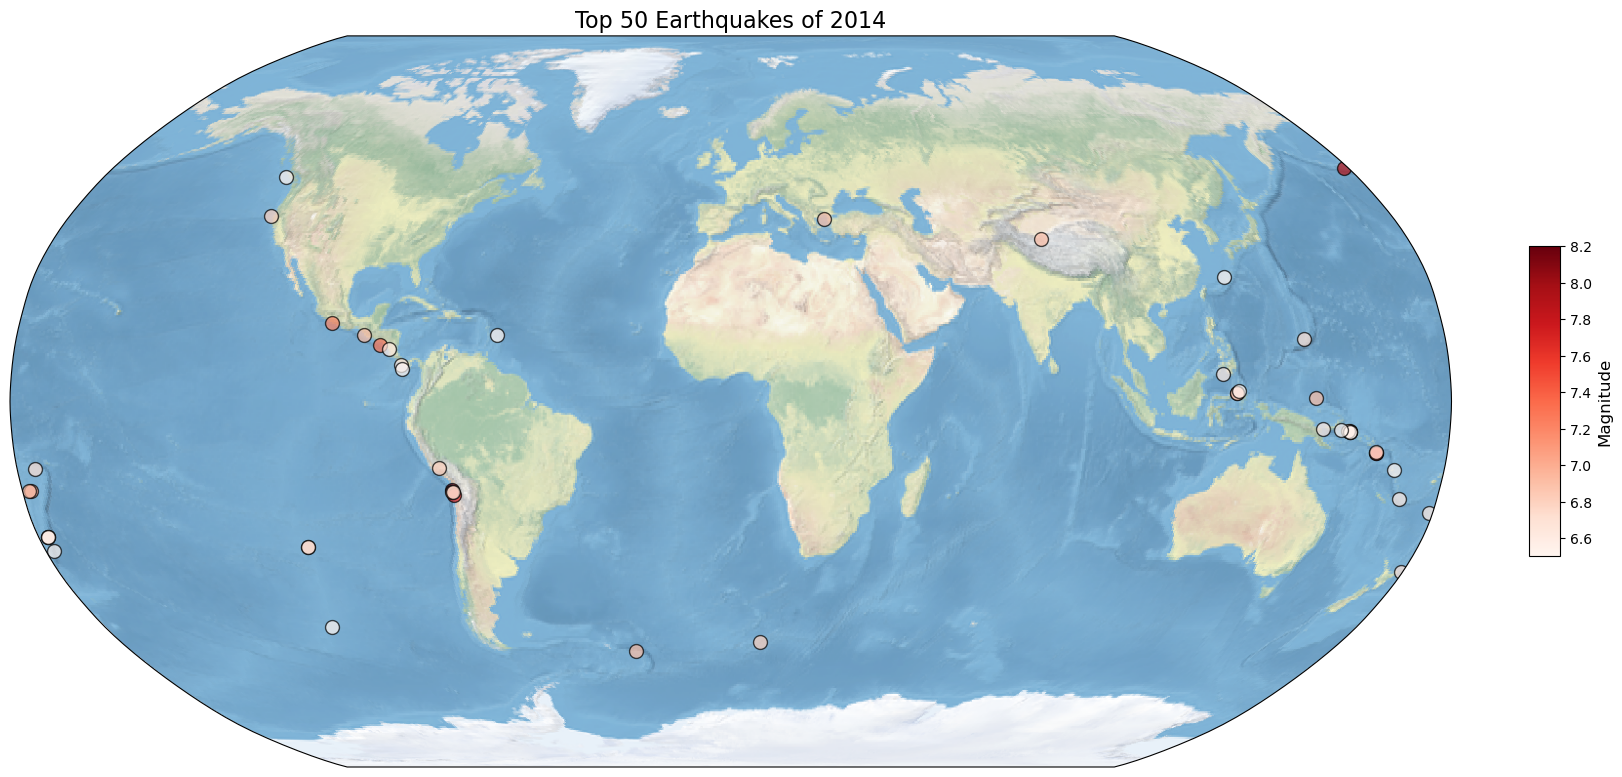

In [2]:
#PS4
#4-1
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 读取CSV文件
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\usgs_earthquakes.csv')

# 按照 'mag'、'drms' 和 'depth' 从大到小排序，并选取前50个数据
df_sorted = df.sort_values(by=['mag', 'rms', 'depth'], ascending=[False, False, False]).head(50)

# 获取前50个地震的经纬度和地震量级
earthquake_data = df_sorted[['mag', 'latitude', 'longitude']]

# 打印前50个地震的数据
print(earthquake_data)

# 创建绘图窗口，设置大小
fig=plt.figure(figsize=(20,15))#设置一个画板，将其返还给fig
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.stock_img()#添加地球背景

# 设置地图标题
ax.set_title('Top 50 Earthquakes of 2014', fontsize=16)

# 在地图上绘制前50个地震的位置
for i, row in earthquake_data.iterrows():
    mag = row['mag']
    lat = row['latitude']
    lon = row['longitude']
    
    # 根据地震的mag值设置颜色和圆圈大小
    color = plt.cm.Reds((mag - 6.5) / (8.2 - 6.5))  # 将地震量级映射到 [0, 1] 范围
    size = 100  # 根据地震量级调整圆圈大小，可以调整100来控制大小的比例

    # 绘制圆圈
    ax.scatter(lon, lat, color=color, s=size, edgecolors='black', alpha=0.7, transform=ccrs.PlateCarree())

# 设定归一化范围
norm = Normalize(vmin=6.5, vmax=8.2)

# 创建 ScalarMappable 对象，使用 Reds 颜色映射
sm = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])  # 使其无数据

# 创建颜色条，设置为竖直方向并缩小
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.05, fraction=0.02, aspect=10)
cbar.set_label('Magnitude', fontsize=12)

# 显示图形
plt.savefig('plotPS4-1.png')
# NOTE: 投影中心与例图不符 -1
plt.show()


<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    XCO2PREC  (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/25)
    RangeBeginningDate:             2017-08-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2017-08-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T12:04:33Z
    History:                        Original file generated: Tue Mar 15 12:04...
    ShortName:     

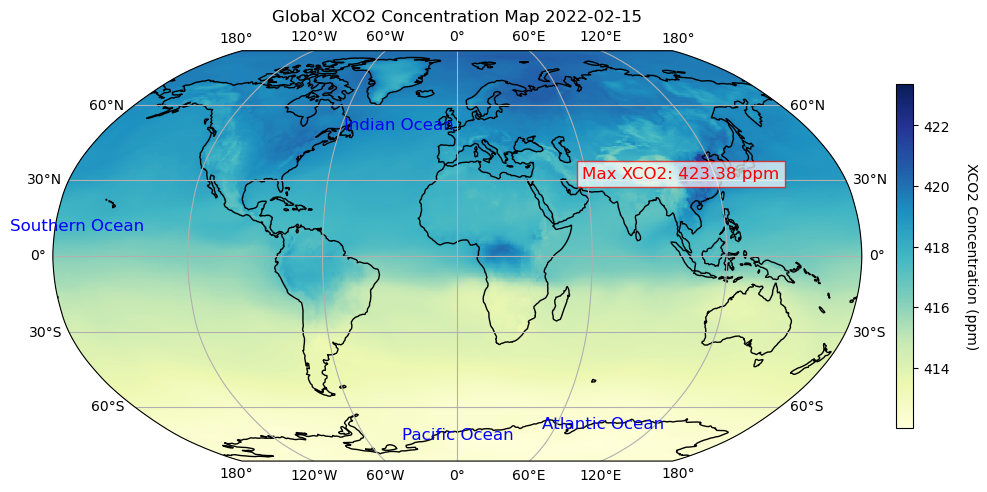

In [11]:
#PS4-2
#PS4-2-1
import xarray as xr

# 1. 打开 netCDF 文件
ds3 = xr.open_mfdataset(r'D:\ESE5023\output_file\oco2_GEOS_L3CO2_month_*.nc4', engine="netcdf4")

print(ds3)

# 2. 获取 XCO2 变量
XCO2 = ds3['XCO2'] * 1000000

# 3. 创建一个投影（使用罗宾逊投影）
projection = ccrs.Robinson()

# 4. 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# 5. 绘制世界地图的底图
ax.set_global()
ax.coastlines(resolution='110m', color='black', linewidth=1)

# 6. 添加陆地和海洋特征
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='lightblue')

# 7. 绘制 XCO2 数据
XCO2_values = XCO2.isel(time=-1)  # 选择最后一个时间
lons = XCO2_values['lon'].values  # 经度
lats = XCO2_values['lat'].values  # 纬度
XCO2_data = XCO2_values.values  # XCO2浓度值

# 8. 绘制 XCO2 数据，使用 pcolormesh 生成色彩图
mesh = ax.pcolormesh(lons, lats, XCO2_data, cmap='YlGnBu', transform=ccrs.PlateCarree(), shading='auto')

# 9. 添加颜色条
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('XCO2 Concentration (ppm)', rotation=270, labelpad=20)

# 10. 设置标签和标题
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Global XCO2 Concentration Map 2022-02-15')

# 11. 添加网格线
ax.gridlines(draw_labels=True)

# 12. 注释：标注 XCO2 值最高的地区
max_idx = np.unravel_index(np.argmax(XCO2_data), XCO2_data.shape)
max_value = XCO2_data[max_idx]
max_lon = lons[max_idx[1]]
max_lat = lats[max_idx[0]]
ax.text(max_lon, max_lat, f'Max XCO2: {max_value:.2f} ppm', transform=ccrs.PlateCarree(),
        color='red', fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='red'))

# 13. 添加文本框：标注四大洋
ax.text(0, -75, 'Pacific Ocean', transform=ccrs.PlateCarree(), fontsize=12, ha='center', color='blue')
ax.text(90, -70, 'Atlantic Ocean', transform=ccrs.PlateCarree(), fontsize=12, ha='center', color='blue')
ax.text(-30, 50, 'Indian Ocean', transform=ccrs.PlateCarree(), fontsize=12, ha='center', color='blue')
ax.text(-170, 10, 'Southern Ocean', transform=ccrs.PlateCarree(), fontsize=12, ha='center', color='blue')

# 14. 显示并保存图像
plt.tight_layout()
plt.savefig('plotPS4-2-1')
plt.show()


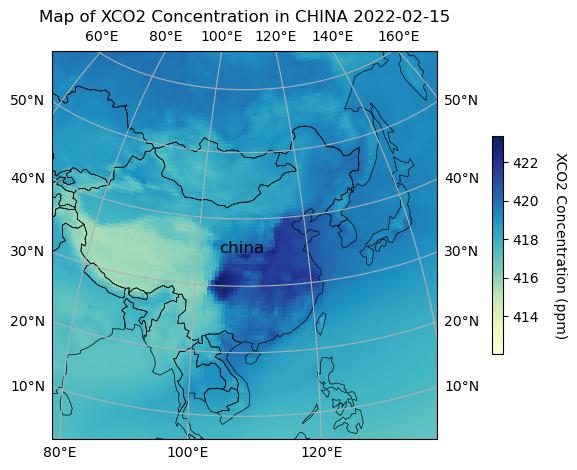

In [35]:
#PS4-2-2
# # 1. 打开 netCDF 文件
# ds3 = xr.open_mfdataset(r'D:\ESE5023\output_file\oco2_GEOS_L3CO2_month_*.nc4', engine="netcdf4")

# # 2. 获取 XCO2 变量
# XCO2 = ds3['XCO2'] * 1000000  # 转换为微摩尔每摩尔（ppm）

# # 3. 选择最后一个时间步的数据
# XCO2_values = XCO2.isel(time=-1)  # 获取最后一个时间步的数据
#前三步重复4-2-1

# 4. 设置经纬度
central_lon, central_lat = 108.55, 34.32 # China

# 5. Create an axes with Orthographic projection style
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

# 6. Set a region and plot
extent = [central_lon-30, central_lon+30, central_lat-30, central_lat+30]
ax.set_extent(extent)

# 7. 添加陆地和海洋特征
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='lightblue')

# 8. 获取经纬度和XCO2数据
lons = XCO2_values['lon'].values
lats = XCO2_values['lat'].values
XCO2_data = XCO2_values.values

# 9. 绘制XCO2数据
mesh = ax.pcolormesh(lons, lats, XCO2_data, cmap='YlGnBu', transform=ccrs.PlateCarree(), shading='auto')

# 10. 添加颜色条（显示XCO2浓度范围）
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('XCO2 Concentration (ppm)', rotation=270, labelpad=20)

# 11. 设置标题和标签
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map of XCO2 Concentration in CHINA 2022-02-15')

# 12. 添加网格线
ax.gridlines(draw_labels=True)
   
# 13. Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# 14. 添加文本框：标注中国
ax.text(108, 35, 'china', transform=ccrs.PlateCarree(), fontsize=12, ha='center', color='black')

# 15. 显示图像
plt.tight_layout()
plt.savefig('plotPS4-2-2.png')
# NOTE: 缺少注释 -1
plt.show()
